<a href="https://colab.research.google.com/github/DMaraboli/Challenge-Alura-Store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


El propósito de este análisis es evaluar el desempeño de cuatro tiendas en términos de:
- Facturación.
- Ventas por categoría.
- Calificación promedio de clientes.
- Productos más y menos vendidos.
- Costos de envío.
- Utilidad.
- Distribución geográfica de ventas.

Esta evaluación permitirá identificar cuál tienda debería ser vendida, con base en criterios financieros y operativos.

#1. Análisis de facturación



,Tienda,Ingreso Total
0,Tienda 1,1150880400.00
1,Tienda 2,1116343500.00
2,Tienda 3,1098019600.00
3,Tienda 4,1038375700.00


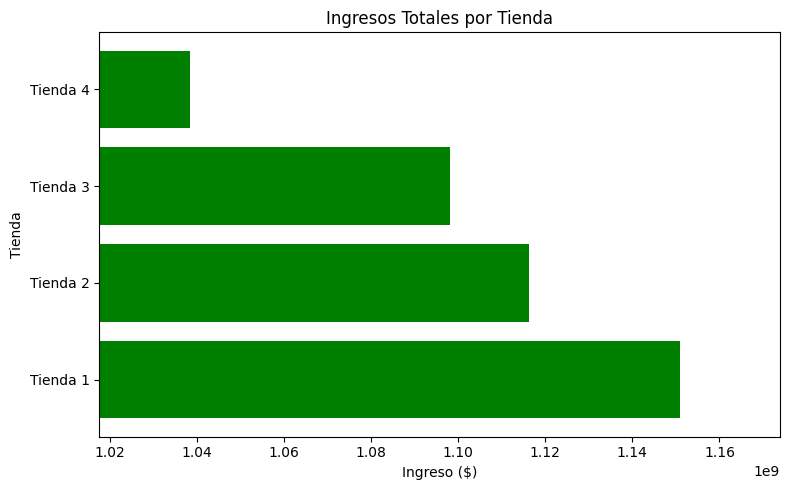

In [2]:
import matplotlib.pyplot as plt

##Agrego columna tienda
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

def totales(tienda,columna):
    suma = tienda.groupby('Tienda')[columna].sum()
    return suma.to_dict()

def conteos(tienda, columna):
    return tienda[columna].value_counts().to_dict()

##Junto las listas en una
tiendas_unidas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)
ingresos = totales(tiendas_unidas,'Precio')
ingresos_df = pd.DataFrame(list(ingresos.items()), columns=['Tienda', 'Ingreso Total'])
ingresos_df['Ingreso Total'] = ingresos_df['Ingreso Total'].round(2)
ingresos_df_styled = ingresos_df.style.format({'Ingreso Total': '{:.2f}'}).set_properties(subset=['Tienda', 'Ingreso Total'], **{'text-align': 'left'})

display(ingresos_df_styled)

tiendas_ingresos = list(ingresos.keys())
valores_ingresos = list(ingresos.values())

plt.figure(figsize=(8, 5))
plt.barh(tiendas_ingresos, valores_ingresos, color='green')
plt.title('Ingresos Totales por Tienda')
plt.xlabel('Ingreso ($)')
plt.ylabel('Tienda')
plt.xlim(min(valores_ingresos) * 0.98, max(valores_ingresos) * 1.02)
plt.tight_layout()
plt.show()
##Transforma en formato fecha
tiendas_unidas['Fecha de Compra'] = pd.to_datetime(tiendas_unidas['Fecha de Compra'], format='%d/%m/%Y')

# 2. Ventas por categoría

In [3]:
def crear_tabla (tienda, columna,n_tienda):
  conteo_t = conteos(tienda, columna)
  conteo_t_df = pd.DataFrame(list(conteo_t.items()), columns=[columna, 'Ventas'])
  styled_df = conteo_t_df.style.set_caption(f'Ventas por Categoría en {n_tienda}').set_properties(subset=[columna, 'Ventas'], **{'text-align': 'left'})
  return display(styled_df)

crear_tabla(tienda, 'Categoría del Producto', 'Tienda 1')
crear_tabla(tienda2, 'Categoría del Producto', 'Tienda 2')
crear_tabla(tienda3, 'Categoría del Producto', 'Tienda 3')
crear_tabla(tienda4, 'Categoría del Producto', 'Tienda 4')


,Categoría del Producto,Ventas
0,Muebles,465
1,Electrónicos,448
2,Juguetes,324
3,Electrodomésticos,312
4,Deportes y diversión,284
5,Instrumentos musicales,182
6,Libros,173
7,Artículos para el hogar,171


,Categoría del Producto,Ventas
0,Muebles,442
1,Electrónicos,422
2,Juguetes,313
3,Electrodomésticos,305
4,Deportes y diversión,275
5,Instrumentos musicales,224
6,Libros,197
7,Artículos para el hogar,181


,Categoría del Producto,Ventas
0,Muebles,499
1,Electrónicos,451
2,Juguetes,315
3,Electrodomésticos,278
4,Deportes y diversión,277
5,Libros,185
6,Instrumentos musicales,177
7,Artículos para el hogar,177


,Categoría del Producto,Ventas
0,Muebles,480
1,Electrónicos,451
2,Juguetes,338
3,Deportes y diversión,277
4,Electrodomésticos,254
5,Artículos para el hogar,201
6,Libros,187
7,Instrumentos musicales,170


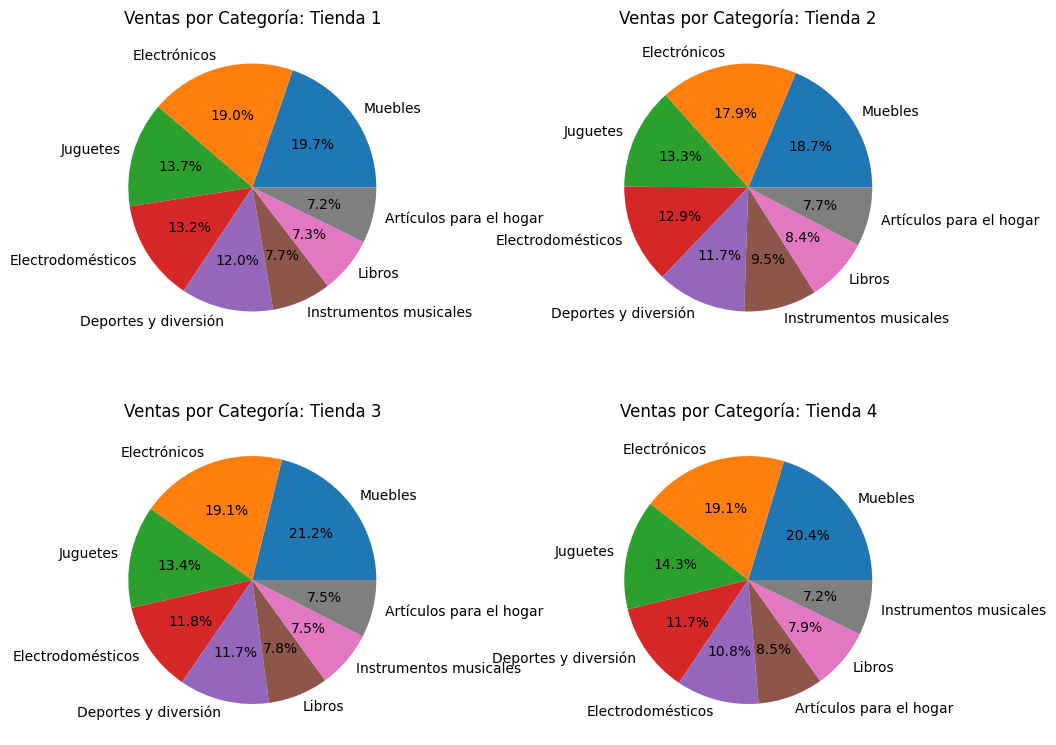

In [4]:
conteo_categoria_t1 = conteos(tienda,'Categoría del Producto')
conteo_categoria_t2 = conteos(tienda2,'Categoría del Producto')
conteo_categoria_t3 = conteos(tienda3,'Categoría del Producto')
conteo_categoria_t4 = conteos(tienda4,'Categoría del Producto')

conteos_categoria = [conteo_categoria_t1, conteo_categoria_t2, conteo_categoria_t3, conteo_categoria_t4]
titulos = ['Ventas por Categoría: Tienda 1', 'Ventas por Categoría: Tienda 2', 'Ventas por Categoría: Tienda 3', 'Ventas por Categoría: Tienda 4']

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for i, ax in enumerate(axs.flat):
    datos = conteos_categoria[i]
    ax.pie(datos.values(), labels=datos.keys(), autopct='%1.1f%%')
    ax.set_title(titulos[i])

plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [5]:
def promedio_calificacion(tienda):
    return tienda.groupby('Tienda')['Calificación'].mean().to_dict()

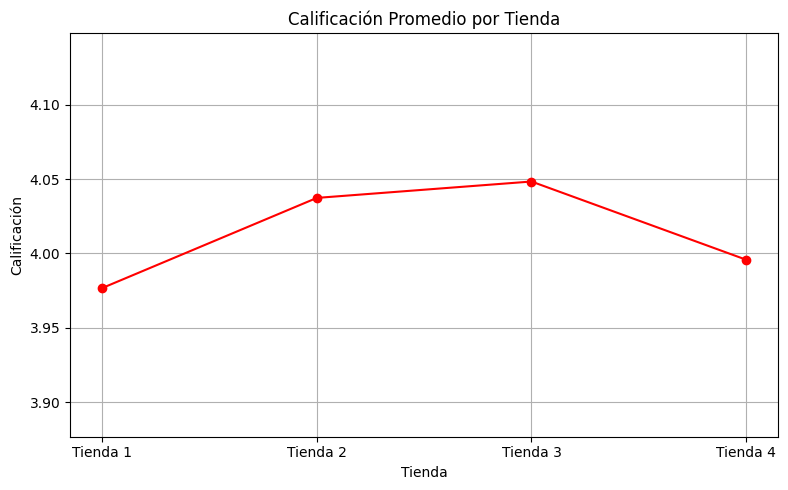

In [6]:
calificacion = promedio_calificacion(tiendas_unidas)
tiendas_calificacion = list(calificacion.keys())
valores_calificacion = list(calificacion.values())
plt.figure(figsize=(8, 5))
plt.plot(tiendas_calificacion, valores_calificacion, marker='o', linestyle='-', color='red')
plt.title('Calificación Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación')
plt.ylim(min(valores_calificacion) - 0.1, max(valores_calificacion) + 0.1)
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [7]:
def mayor (conteos):
    valor_max = max(conteos.values())
    mayor = [k for k, v in conteos.items() if v == valor_max]
    return mayor

def menor (conteos):
    valor_min = min(conteos.values())
    menor = [k for k, v in conteos.items() if v == valor_min]
    return menor

In [8]:
tiendas_p = [tienda, tienda2, tienda3, tienda4]
nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

conteos_productos = [conteos(t, 'Producto') for t in tiendas_p]

mayores = {nombre: mayor(conteo) for nombre, conteo in zip(nombres, conteos_productos)}
mayores_df = pd.DataFrame(list(mayores.items()),columns=['Tienda', 'Productos más Vendidos'])
mayores_df_styled = mayores_df.style.set_properties(subset=['Tienda', 'Productos más Vendidos'], **{'text-align': 'left'})
display(mayores_df_styled)

menores = {nombre: menor(conteo) for nombre, conteo in zip(nombres, conteos_productos)}
menores_df = pd.DataFrame(list(menores.items()), columns=['Tienda', 'Productos menos Vendidos'])
menores_df_styled = menores_df.style.set_properties(subset=['Tienda', 'Productos menos Vendidos'], **{'text-align': 'left'})
display(menores_df_styled)


,Tienda,Productos más Vendidos
0,Tienda 1,"['Microondas', 'TV LED UHD 4K', 'Armario']"
1,Tienda 2,['Iniciando en programación']
2,Tienda 3,['Kit de bancas']
3,Tienda 4,['Cama box']


,Tienda,Productos menos Vendidos
0,Tienda 1,"['Auriculares con micrófono', 'Celular ABXY']"
1,Tienda 2,['Juego de mesa']
2,Tienda 3,['Bloques de construcción']
3,Tienda 4,['Guitarra eléctrica']


# 5. Envío promedio por tienda

,Costo de envío
Tienda,
Tienda 1,26018.61
Tienda 2,25216.24
Tienda 3,24805.68
Tienda 4,23459.46


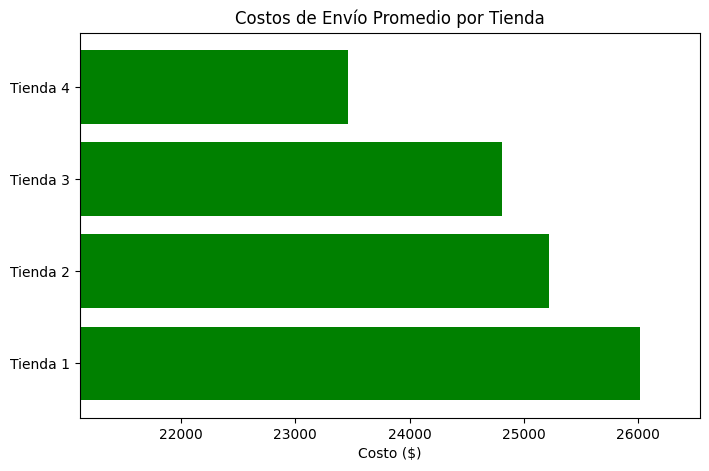

In [47]:
envios_df = tiendas_unidas.groupby('Tienda')['Costo de envío'].mean() ##
envios_df = envios_df.round(2)
envios_df = pd.DataFrame(envios_df)
display(envios_df)

plt.figure(figsize=(8, 5))
plt.barh(envios_df.index,envios_df['Costo de envío'], color='green')
plt.title('Costos de Envío Promedio por Tienda')
plt.xlabel('Costo ($)')
plt.xlim(min(envios_df['Costo de envío']) * 0.9, max(envios_df['Costo de envío']) * 1.02)

plt.show()




# 6. Utilidad por tienda

,Tienda,Utilidad
0,Tienda 1,1089502500.00
1,Tienda 2,1056858400.00
2,Tienda 3,1039503000.00
3,Tienda 4,983058300.00


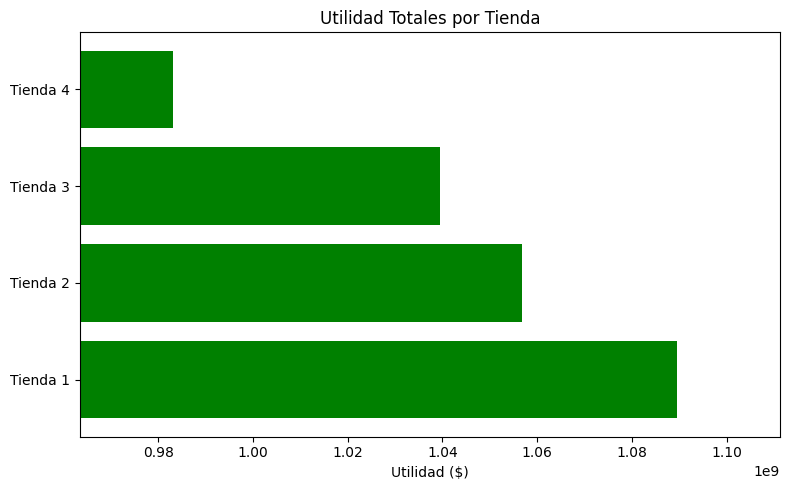

In [10]:
utilidades = tiendas_unidas.groupby('Tienda')[['Precio','Costo de envío']].sum()
utilidades['Utilidad'] = utilidades['Precio'] - utilidades['Costo de envío']
utilidades_dict = utilidades['Utilidad'].to_dict()
utilidades_df = pd.DataFrame(list(utilidades_dict.items()), columns=['Tienda', 'Utilidad'])
utilidades_df['Utilidad'] = utilidades_df['Utilidad'].round(2)
utilidades_df_styled = utilidades_df.style.format({'Utilidad': '{:.2f}'}).set_properties(subset=['Tienda', 'Utilidad'], **{'text-align': 'left'})
display(utilidades_df_styled)

tiendas_utilidad = list(utilidades_dict.keys())
valores_utilidad = list(utilidades_dict.values())
plt.figure(figsize=(8, 5))
plt.barh(tiendas_utilidad, valores_utilidad, color='green')
plt.title('Utilidad Totales por Tienda')
plt.xlabel('Utilidad ($)')
plt.xlim(min(valores_utilidad) * 0.98, max(valores_utilidad) * 1.02)
plt.tight_layout()
plt.show()

# 7. Extra

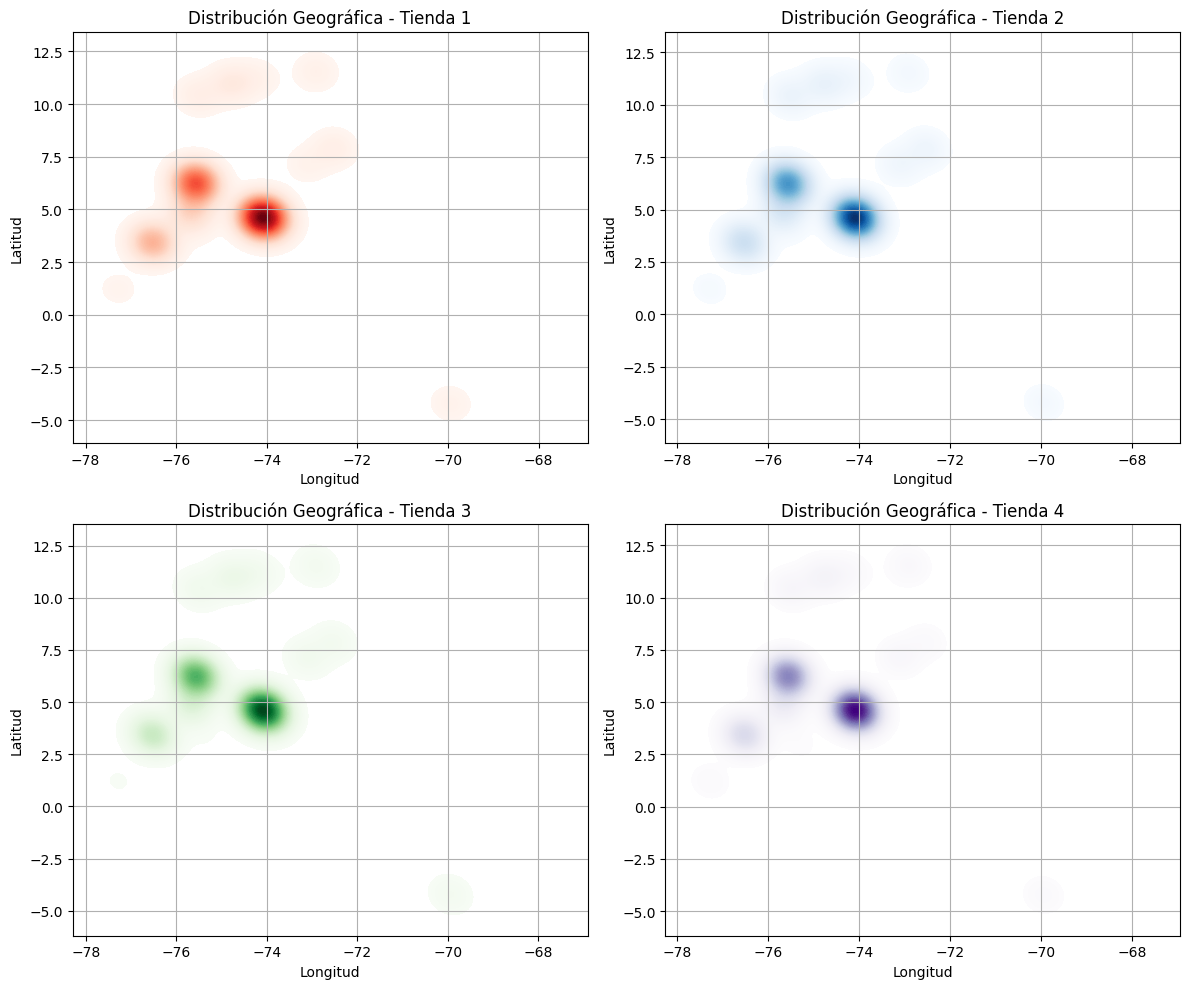

In [11]:
import seaborn as sns

nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
colores = ['Reds', 'Blues', 'Greens', 'Purples']

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for ax, tienda_nombre, cmap in zip(axs.flat, nombres_tiendas, colores):
    subset = tiendas_unidas[tiendas_unidas['Tienda'] == tienda_nombre]

    sns.kdeplot(
        data=subset, x='lon', y='lat',
        fill=True, cmap=cmap, bw_adjust=1.0, levels=100, thresh=0.05, ax=ax
    )

    ax.set_title(f'Distribución Geográfica - {tienda_nombre}')
    ax.set_xlabel('Longitud')
    ax.set_ylabel('Latitud')
    ax.grid(True)

plt.tight_layout()
plt.show()




Tras realizar un análisis exhaustivo del desempeño de las cuatro tiendas en términos de ingresos, utilidad neta, calificación de clientes y costos de envío, se identifican diferencias clave que permiten tomar una decisión informada sobre cuál tienda debería cerrarse.

- La **Tienda 4** presenta el menor ingreso total con $1,038,375,700.

- También registra la utilidad neta más baja con $983,058,300, lo que la posiciona como la menos rentable del grupo.

- En cuanto a la calificación promedio, aunque no es la peor, (3.995 frente a 3.977 de **Tienda 1**), sigue estando por debajo de **Tienda 2** (4.037) y **Tienda 3** (4.048), que son mejor valoradas por los clientes.

- Además, aunque sus costos de envío son los más bajos en términos absolutos ($55,317,400), esta diferencia no es suficiente para compensar su bajo desempeño en ingresos y utilidad.

- La Distribución geográfica no muestra diferecncias significativas entre las tiendas,por lo tanto no es un dato relevante para determinar que tienda cerrar.

En consecuencia, se recomienda cerrar la **Tienda 4**, ya que es la que aporta menos valor al negocio tanto desde el punto de vista financiero como operativo. Esta decisión permitirá concentrar los recursos y esfuerzos en las tiendas con mayor rentabilidad, mejor percepción por parte de los clientes y mayor potencial de crecimiento a largo plazo.
